# EXAMEN PRÁCTICA 1

> **Alumno**: Quintín Mesa Romero

>  **Curso**: 3º DGIIM
  
>  **DNI**: 78006011Q
  
>  **Correo**: quintinmr@correo.ugr.es

## Enunciado

Resuelve la ecuación cúbica:


$x^{3} + (media\_digits)x + (suma\_digits)$

_________________________________________________________________

In [1]:
#Importacion de la biblioteca de numpy con el alias np
import numpy as np
#Importacion de la biblioteca matplotlib con el alias plt
%matplotlib inline
import matplotlib.pyplot as plt
#Importacion de la biblioteca sympy con el alias sp
import sympy as sp
#Importacion de la biblioteca decimal (trabajar con precision ajustada)
from decimal import *
mporig = getcontext().prec
#Importación de la función fsolve
from scipy.optimize import fsolve
#Importación de los solucionadores de sympy
from sympy.solvers import solve, nsolve, solveset
#Importación de los métodos ceil y floor de la biblioteca Math
from math import ceil, floor

### Definimos una serie de funciones que nos van a hacer falta a la hora de calcular las soluciones de la ecuación y de sus aproximaciones.

In [2]:
#Función que calcula la suma de una serie de números
def suma (v):
    
    sum = 0
    for i in range (len(v)):
        sum = sum + v[i]
    
    return sum

In [3]:
#Función que calcula la media de los elementos de un vector
def mean (v):
    
    media = suma(v)
    
    return media/8

In [4]:
# Función que determina si una función cambia de signo en un intervalo dado:
def sgn(f,a,b):
    if f(a)*f(b) < 0:
        print("Sí hay cambio de signo: Hay raíz")
    else:
        print("No hay cambio de signo: No hay raíz")

In [5]:
def calc_cifras(precision):
    
    return int(np.ceil(abs(np.log10(precision))))

In [6]:
# Definimos de forma simbólica la variable x
x=sp.Symbol("x") #Variable Simbólica x

In [7]:
# Función destinada al cálculo de las raíces de una ecuación, en una variable dada:
def sol_exact(f,x,todas=True):
    try:
        soluciones = sp.solve(f(x),x)
        num_sols   = len(soluciones)
        if todas==True:
            print("Se han encontrado : {} soluciones".format(num_sols))
            for i in range(num_sols):
                print("Solución {}: {}".format(i+1,soluciones[i].evalf()))
        return soluciones,num_sols
    except NotImplementedError:
        print("No existen soluciones para esta ecuación : {}".format(f(x))) 


In [8]:
# Método de bisección
# Vamos a encapsular el método de bisección en una función

def biseccion (a, b, f, cifras=16,muestra=True, nmax=100, prec=10**(-16)):

    a=Decimal(a)
    b=Decimal(b)
    niter = 0
    terms = []

    if (cifras <= 0):
        cifras = calc_cifras(prec)
     
    tol = 10**(-cifras+1)
    getcontext().prec = cifras

    for i in range(nmax):
        niter = niter + 1
        c = (a+b)/2
        terms.append(float(c))
        if (abs(f(c)) < prec):
            p = "Precision"
            break
        if (f(a)*f(c) <= 0):
            b = c
        else: 
            a = c
        if b-a < tol:
            p = "Tolerance"
            break
    
    if (muestra):
        print("MÉTODO DE BISECCIÓN APLICADO A LA ECUACIÓN: ", f(x))
        
        if (p == "Precision"):
            print("Se ha alcanzado la precisión requerida. Posible solución exacta: ", c )
        elif niter < nmax:
            print("Aproximación con decimales: ", c)
        else:
            print("Intervalo con maxima tolerancia. Aproximación solicitada: ", c)

        print("Numero de iteraciones requerido: ", niter)

    return terms

In [9]:
# Método de Newton-Raphson
# Vamos a encapsular el método de Newton-Raphson en una función
def newton_raphson( b, f, deriv, cifras=16, muestra=True, nmax=100, prec=10**(-16)):

    x0=Decimal(b)
    
    tol = 10**(-cifras+1)
    getcontext().prec = cifras

    niter = 0
    terms = [b]

    for k in range(nmax):
        niter = niter + 1
        x1 = x0 - f(x0)/deriv(x0)  # método de Newton-Raphson
        terms.append(float(x1))
        if abs(x1-x0) < tol:
            p = 'tolerancia'
            break
        if abs(f(x1)) < prec:
            p = 'precision'
            break
        else:
            x0 = x1

    if (muestra):
        #print("MÉTODO DE NEWTON-RAPHSON APLICADO A LA ECUACIÓN: ", f(x))
        if (p == "Precision"):
            print("Se ha alcanzado la precisión requerida. Posible aproximación: ", x1)
        else:
            print("Intervalo con maxima tolerancia. Aproximación solicitada: ", x1)

        print("Numero de iteraciones requerido: ", niter)

    getcontext().prec = mporig # Se restaura la precisión por defecto

    return terms

In [10]:
#Función que permite calcular el número de iteraciones necesarias en el método de bisección para llegar a la aproximación de la solución, con un
#error dado
def num_iter(a,b,cifras):
    
    n = np.log((b-a)/10**(-5))/np.log(2) - 1
    return ceil(n)



--------------------------------------------

---------------------------------------------------

Una vez definidas las funciones necesarias para el desarrollo del ejercicio, procedemos a resolverlo:

### **Definición de la función:**

In [11]:
#Defino el DNI
DNI = [7,8,0,0,6,0,1,1]

In [12]:
#Defino el polinomio asociado a mi DNI
def f(x):
    
    return x**3 + Decimal(mean(DNI))*sp.exp(x) + suma(DNI)

print("Polinomio asociado al DNI {}: {}".format(DNI,f(x)))

Polinomio asociado al DNI [7, 8, 0, 0, 6, 0, 1, 1]: x**3 + 2.875*exp(x) + 23


### **Cálulo exacto de soluciones**

Observamos gráficamente que solo tiene una raíz real, y en el intervalo $[-3,-2]$.

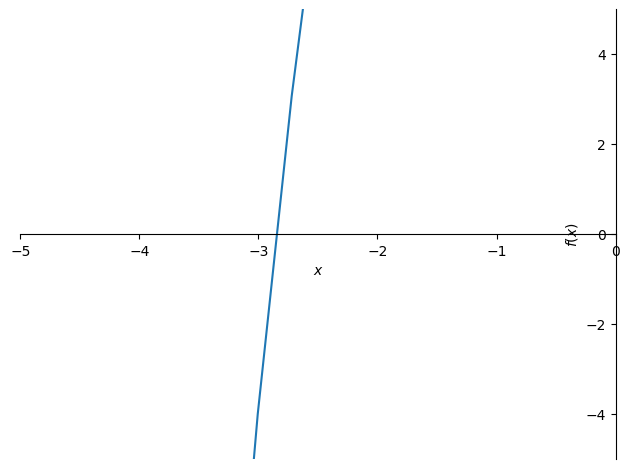

In [13]:
sp.plot(f(x),xlim=(-5.0,0.0),ylim=(-5.0,5.0))

Comprobémoslo de forma analitica con la función **nsolve** (la función que hemos confeccionado para el cálculo de raíces no nos sirve para funciones en las que aparezcan funciones trigonométricas o exponenciales):

In [14]:
#Calculamos la raíz real que posee la ecuación:
sol = nsolve(f(x),x,-3)
sol

-2.85069998418095

### Método de Bisección

Vamos a calcular una aproximación de la solución real anteriormente obtenida en el intervalo $[-3,-2]$, con una toleracia de $10^{-5}$, es decir, con una precisión de $5$ cifras decimales. Pero ante,s aunque es obvio, veamos que verifica las condiciones del Teorema de Bolzano para así, poder aplicar Bisección:

In [15]:
sgn(f, -3,-2)

Sí hay cambio de signo: Hay raíz


Como la funcion cambia de signo en dicho intervalo, donde además es continua y derivable por ser una función polinómica, verifica el Teorema de Bolzano.

In [16]:
#Aplicamos método de Bisección
a,b=-3,-2
cifras=6
bise = biseccion(a,b,f,cifras,True)

MÉTODO DE BISECCIÓN APLICADO A LA ECUACIÓN:  x**3 + 2.875*exp(x) + 23
Aproximación con decimales:  -2.85069
Numero de iteraciones requerido:  17


In [17]:
#Comprobemos el número de iteraciones requerido para este método:
num_iter(a,b,cifras)

16

### Método de Newton-Raphson

A continuación vamos a aplicar el método de Newton-Raphson a la ecuación que tenemos entre manos. Para ello, vamos a tomar en primer lugar una semilla $x_{0} = -2.4$ la cual sabemos que es válida por la gráfica de la función y por el resultado exacto obtenido anteriormente.

In [19]:
#Definimos la derivada:
def df(x):
    
    return 3*x**2 + Decimal(2.875)*sp.exp(x)

In [20]:
#Aplicamos el método de Newton-Raphson
v0 = -2.4
cifras = 6
nr = newton_raphson(v0,f,df,cifras,True)


Intervalo con maxima tolerancia. Aproximación solicitada:  -2.85069998418263
Numero de iteraciones requerido:  4
